In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Timeseries forecasting and fault detection  in PT100 temperature sensor.

To perform time series analysis and detect faults in a PT100 temperature sensor dataset, you can follow these steps:

**Preprocess the data**:
- Check for missing values and handle them appropriately (e.g., interpolation, imputation).
- Remove any outliers or erroneous data points.
- Ensure the data is in the correct format (e.g., timestamps, temperature values).

**Visualize the data**:
- Plot the temperature values over time to identify any abnormal patterns or trends.
- Use techniques like line plots, scatter plots, or heatmaps to explore the data.

**Analyze the time series characteristics**:
- Check for stationarity using tests like Augmented Dickey-Fuller (ADF) test.
- Identify any seasonality or trends in the data.
- Calculate descriptive statistics like mean, median, standard deviation, and correlation.

**Build a fault detection model**:
- Choose an appropriate fault detection technique based on the characteristics of your data (e.g., statistical methods, machine learning models).
- Train the model using historical data without faults.
- Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.

**Apply the fault detection model to new data**:
- Use the trained model to predict if new temperature sensor readings are normal or faulty.
- Identify any deviations from the expected behavior as potential faults.

**Validate and refine the fault detection process**:
- Verify the detected faults with domain experts or additional data sources.
- Continuously monitor the performance of the fault detection model and refine it as needed.

By following these steps and leveraging the provided datasets, you can effectively perform time series analysis and detect faults in PT100 temperature sensor data.

### models we will use:
- ARIMA
- SARIMA
- LSTM
- XGBoost

### EDA:
- Check for missing values
- Check for outliers
- Check for seasonality
- Check for trends
- Check for stationarity
- Check for correlation

### Preprocessing:
- Handle missing values

### Feature Engineering:
- Extract features from timestamps


In [2]:
# Load the data
df = pd.read_excel("..\datasets\intermittent_fault.xlsx")

# lets convet this xlsx file to csv file
df.to_csv("..\datasets\intermittent_fault.csv", index=False)

In [3]:
df = pd.read_csv("..\datasets\intermittent_fault.csv")

In [4]:
df

,2016-05-25 21:15:39,31.81
0,2016-05-25 21:15:40,31.17
1,2016-05-25 21:15:40,31.32
2,2016-05-25 21:15:41,31.66
3,2016-05-25 21:15:41,31.00
4,2016-05-25 21:15:42,31.63
...,...,...
873,2016-05-25 21:22:59,31.44
874,2016-05-25 21:22:59,31.49
875,2016-05-25 21:23:00,31.05
876,2016-05-25 21:23:00,121.29


In [5]:
# prepare the data
df.isna().sum()

2016-05-25 21:15:39    0
31.81                  0
dtype: int64

In [6]:
# no null values

# lets check the data types
df.dtypes

df.columns = ["date","value"]
df

,date,value
0,2016-05-25 21:15:40,31.17
1,2016-05-25 21:15:40,31.32
2,2016-05-25 21:15:41,31.66
3,2016-05-25 21:15:41,31.00
4,2016-05-25 21:15:42,31.63
...,...,...
873,2016-05-25 21:22:59,31.44
874,2016-05-25 21:22:59,31.49
875,2016-05-25 21:23:00,31.05
876,2016-05-25 21:23:00,121.29


In [7]:
df["date"] = pd.to_datetime(df["date"])


In [8]:
df.dtypes   

date     datetime64[ns]
value           float64
dtype: object

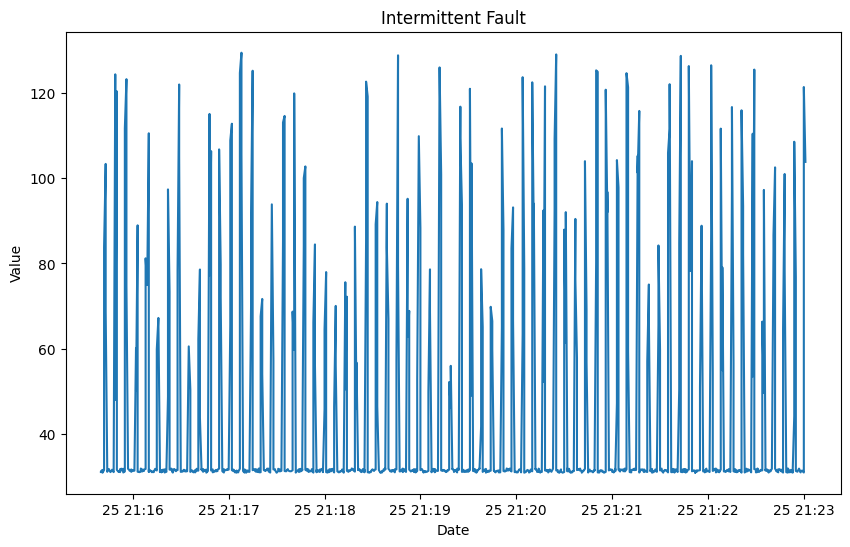

In [9]:
# EDA
plt.figure(figsize=(10,6))
plt.plot(df["date"], df["value"])
plt.title("Intermittent Fault")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()


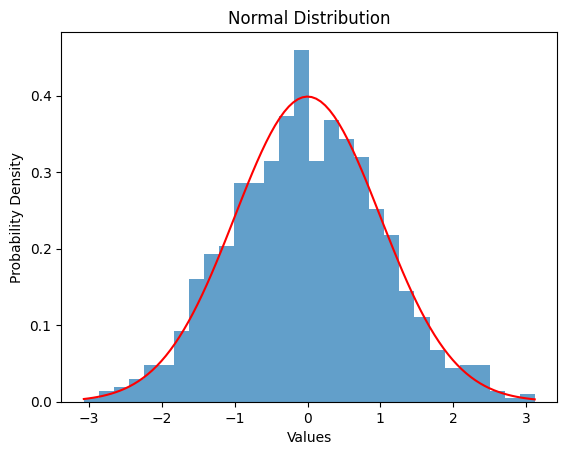

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Set the mean and standard deviation
mean = 0
std_dev = 1

# Generate random numbers from a normal distribution
data = np.random.normal(mean, std_dev, 1000)

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.7)

# Plot the probability density function
x = np.linspace(min(data), max(data), 100)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
plt.plot(x, y, color='red')

# Set the plot labels and title
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')

# Show the plot
plt.show()

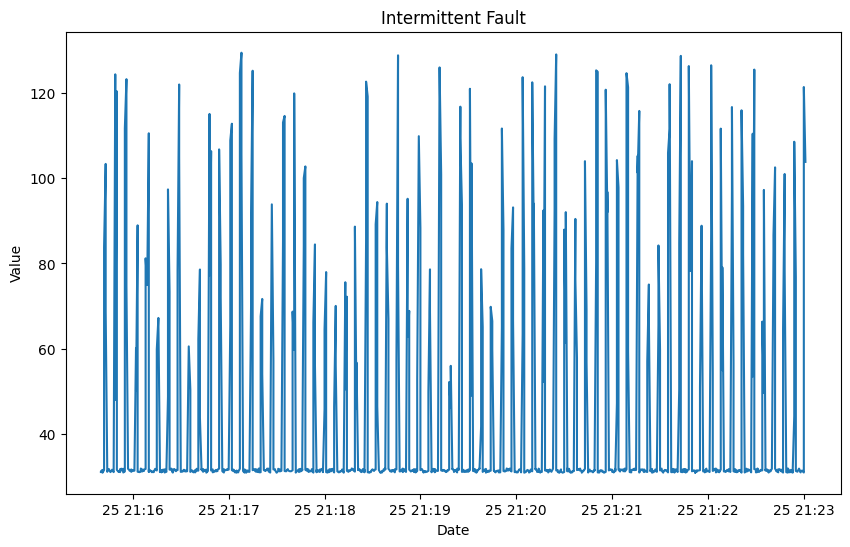

In [11]:
# line plot
plt.figure(figsize=(10,6))
plt.plot(df["date"], df["value"])
plt.title("Intermittent Fault")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()


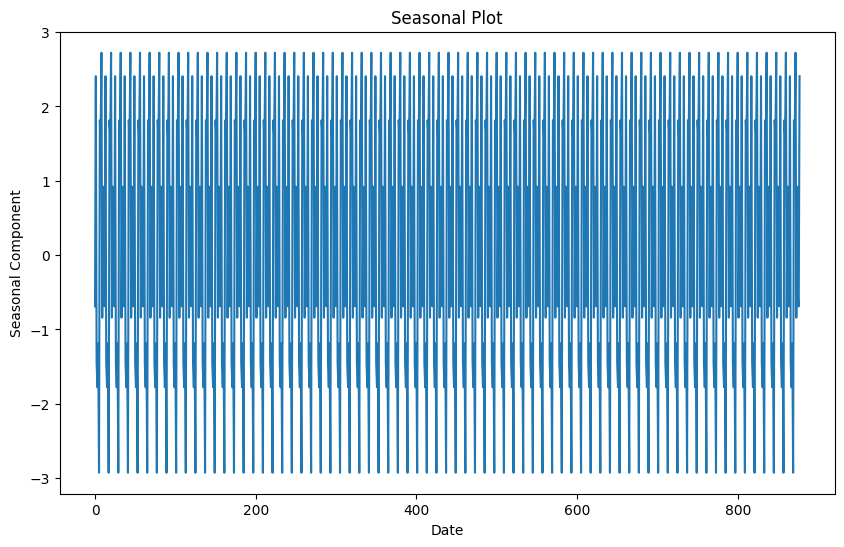

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['value'], model='additive', period=12)

# Plot the seasonal component
result.seasonal.plot(figsize=(10, 6))
plt.title('Seasonal Plot')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.show()

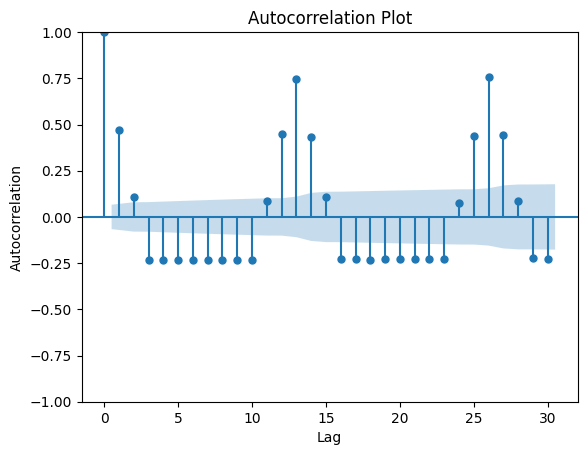

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation
plot_acf(df['value'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

In [14]:
df= pd.read_csv("..\datasets\intermittent_fault.csv")
df.columns = ["date","value"]

df


,date,value
0,2016-05-25 21:15:40,31.17
1,2016-05-25 21:15:40,31.32
2,2016-05-25 21:15:41,31.66
3,2016-05-25 21:15:41,31.00
4,2016-05-25 21:15:42,31.63
...,...,...
873,2016-05-25 21:22:59,31.44
874,2016-05-25 21:22:59,31.49
875,2016-05-25 21:23:00,31.05
876,2016-05-25 21:23:00,121.29


In [15]:
# Forecast the next 10 values




from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df, order=(5, 1, 0))
model_fit = model.fit()

# Get the summary of the model
model_fit.summary()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
forecast = model_fit.forecast(steps=10)
forecast

q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


878    95.293407
879    65.922147
880    67.159122
881    69.940535
882    82.720613
883    83.897838
884    82.826554
885    77.609624
886    76.423149
887    76.690900
Name: predicted_mean, dtype: float64

In [16]:
df = pd.read_csv("..\datasets\intermittent_fault.csv")
df.columns = ["date","value"]

In [17]:
df.head()



,date,value
0,2016-05-25 21:15:40,31.17
1,2016-05-25 21:15:40,31.32
2,2016-05-25 21:15:41,31.66
3,2016-05-25 21:15:41,31.00
4,2016-05-25 21:15:42,31.63


In [18]:
df.head(10)

,date,value
0,2016-05-25 21:15:40,31.17
1,2016-05-25 21:15:40,31.32
2,2016-05-25 21:15:41,31.66
3,2016-05-25 21:15:41,31.00
4,2016-05-25 21:15:42,31.63
5,2016-05-25 21:15:42,83.79
6,2016-05-25 21:15:43,103.29
7,2016-05-25 21:15:43,68.79
8,2016-05-25 21:15:44,31.22
9,2016-05-25 21:15:44,31.40


In [19]:
df['date'] = pd.to_datetime(df['date'])
df.set_index(df['date'].dt.strftime('%H:%M:%S'), inplace=True)
df.drop('date', axis=1, inplace=True)


In [20]:
df.info()
model_df = df["value"]


<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 21:15:40 to 21:23:01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   878 non-null    float64
dtypes: float64(1)
memory usage: 13.7+ KB


In [31]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test = train_test_split(model_df, test_size=0.1, shuffle=True, random_state=42 )

# Fit the ARIMA model
model = ARIMA(X_train, order=(5, 1, 0))
model_fit = model.fit()
# Get the summary of the model
model_fit.summary()



q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
q:\project\isa-sponsored-project\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, f

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  790
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3734.425
Date:                Sun, 12 May 2024   AIC                           7480.850
Time:                        09:06:45   BIC                           7508.875
Sample:                             0   HQIC                          7491.623
                                - 790                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8373      0.036    -23.117      0.000      -0.908      -0.766
ar.L2         -0.6802      0.048    -14.183      0.000      -0.774      -0.586
ar.L3         -0.4699      0.050     -9.345      0.000      -0.568      -0.371
ar.L4         -0.3082      0.048     -6.470      0.000      -0.402      -0.215
ar.L5         -0.1898      0.035     -5.410      0.000      -0.259      -0.121
sigma2       755.2394     26.543     28.454      0.000     703.217     807.262
===================================================================================
Ljung-Box (L1) (Q):                   1.11   Jarque-Bera (JB):               505.97
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             1.63
Prob(H) (two-sided):                  0.13   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

>expected=31.4, predicted=35.7
>expected=31.2, predicted=27.5
>expected=31.2, predicted=32.0
>expected=32.0, predicted=33.7
>expected=32.0, predicted=32.9
>expected=31.1, predicted=28.4
>expected=31.4, predicted=28.9
>expected=31.4, predicted=31.5
>expected=31.5, predicted=27.3
>expected=31.1, predicted=45.3
>expected=121.3, predicted=51.7
>expected=103.8, predicted=84.4
MAE: 10.349


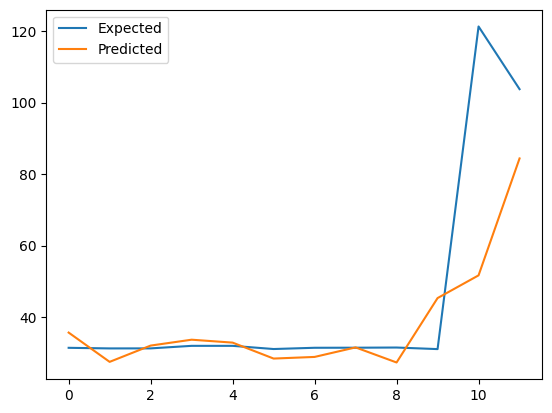

date      object
value    float64
dtype: object

In [47]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

# load the dataset
series = read_csv('..\datasets\intermittent_fault.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()
df.dtypes


In [56]:
from sklearn.ensemble import IsolationForest
import pandas as pd

df = pd.read_csv("..\datasets\intermittent_fault.csv")
df.columns = ["date","value"]
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)



# Fit the model
model = IsolationForest(contamination=0.01)
model.fit(df)

# Get the anomaly score


# Get the anomaly 
df['anomaly'] = model.predict(df)

# Display the anomalies




In [60]:
df[df['anomaly'] == -1].sum()

value      898.01
anomaly     -9.00
dtype: float64

In [62]:
# total number of anomalies
df[df['anomaly'] == -1].shape[0]

9

In [63]:
df[df['anomaly'] == 1].shape[0]

869

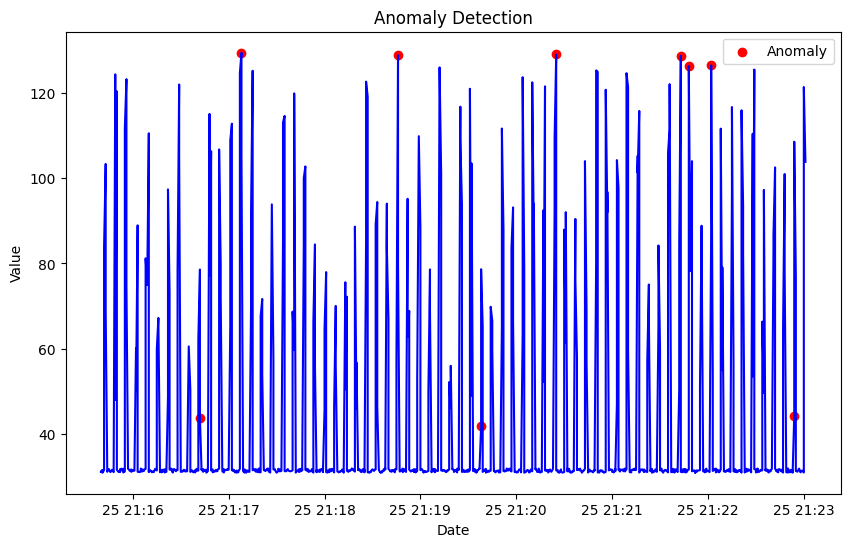

In [64]:
# plot the anomalies with the original data
plt.figure(figsize=(10,6))
plt.plot(df.index, df['value'], color='blue')
plt.scatter(df[df['anomaly'] == -1].index, df[df['anomaly'] == -1]['value'], color='red', label='Anomaly')
plt.title('Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()


In [68]:
df.describe()

,value,anomaly
count,878.000000,878.000000
mean,43.890319,0.979499
std,25.618527,0.201565
min,31.000000,-1.000000
25%,31.300000,1.000000
50%,31.610000,1.000000
75%,31.960000,1.000000
max,129.320000,1.000000


In [73]:
# Mean value of regular data
mean_value = df[df['anomaly'] == 1]['value'].mean()

# now classify the anomalies
if df[df['anomaly'] == -1].empty:
    if df[df["value"] > mean_value].empty:
        df["anomaly_type"] = "Low Anomaly"
    else:
        df["anomaly_type"] = "High Anomaly"
else:
    df["anomaly_type"] = "Regular Data"



In [76]:
df.drop("anomaly_class", axis=1, inplace=True)

In [77]:
df

,value,anomaly,anomaly_type
date,,,
2016-05-25 21:15:40,31.17,1,Regular Data
2016-05-25 21:15:40,31.32,1,Regular Data
2016-05-25 21:15:41,31.66,1,Regular Data
2016-05-25 21:15:41,31.00,1,Regular Data
2016-05-25 21:15:42,31.63,1,Regular Data
...,...,...,...
2016-05-25 21:22:59,31.44,1,Regular Data
2016-05-25 21:22:59,31.49,1,Regular Data
2016-05-25 21:23:00,31.05,1,Regular Data
